<a href="https://colab.research.google.com/github/meriem-belkacemi/Machine-Learning-Notebooks/blob/main/TP_6_RN21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Travail réalisé par :


*   BELKACEMI Meriem
*   LABRI Ahlem
*   MAYOUF Lotfi








# Réseaux de neurones - Multi classification et Propagation en arrière
Dans ce TP, nous aimerions entrainer un réseau de neurones pour la tâche de classification en utilisant l'algorithme d propagation en arrière (backpropagation).

L'ensemble de données que nous allons utiliser est le même que celui utilisé durant le TP1, i.e. les images de chiffres manuscrits.


# Importation des librairies necessaires au travail

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
import cv2

# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [ ]:
# données
data = np.genfromtxt('data_2.csv', delimiter=',', dtype=float)
data.shape

(5000, 401)

Dans ces données (data), les 400 premières colonnes representent les pixels de l'image (20x20), la dernière colonne represente la classe de l'image (chiffres de 0 à 9). (http://yann.lecun.com/exdb/mnist/)

Chaque ligne represente un exemple de notre ensemble de données.

Mettons ces données dans leus vecteurs correspondants.

In [ ]:
# rajoutons l'ordonnée à l'origine theta 0
intercept=np.ones((data.shape[0],1))
X=np.column_stack((intercept,data[:,:-1]))
y=data[:,-1]
# forcer y à avoir une seule colonne
y = y.reshape( y.shape[0], 1)

In [ ]:
print('X', X.shape ,' y ', y.shape)

X (5000, 401)  y  (5000, 1)


Visualisation aléatoire de quelques données

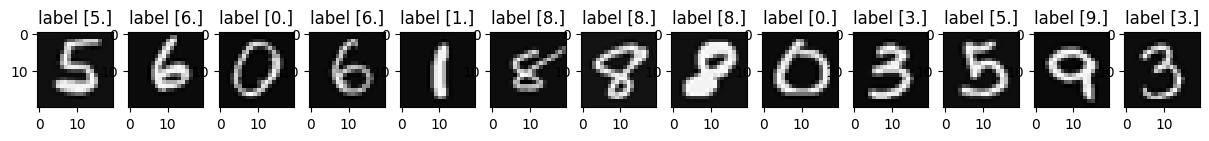

In [ ]:
plt.figure(figsize=(15,8))
for i in range(13):
    c = random.randint(X.shape[0])
    a = X[c,1:].reshape((20, 20))
    a=np.transpose(a)
    plt.subplot(1,13,i+1)
    plt.title('label '+ str(y[c]))
    plt.imshow(a,cmap='gray')

Transformer y de tel sorte à avoir un vecteur pour chaque exemple

Equivalent de tocategorical

In [ ]:
YY=np.zeros((y.shape[0], int(np.max(y))+1))
YY.shape

(5000, 10)

In [ ]:
for i in range (YY.shape[0]):
    YY[i,int(y[i])]=1

# Réseaux de neurones
Pour cette partie, nous choisissons une réseau simple:

- une couche d'entrée avec 400 noeuds (20 x 20 pixels) + le biais
- une couche cachée avec 25 noeuds
- une couche de sortie avec 10 noeuds (nombre de classes)

In [ ]:
# poids de la couche 1
W1 = np.genfromtxt('W1.csv', delimiter=',', dtype=float)
W1.shape


(25, 401)

In [ ]:
# poids de la couche 2
W2 = np.genfromtxt('W2.csv', delimiter=',', dtype=float)
W2.shape

(10, 26)

In [ ]:
input_layer_size  = 400
hidden_layer_size = 25
num_labels = 10

# Calcul du coût

# TODO  1 calcul du coût
**Tâche 1**: Modifier la fonction computeCost afin d'obtenir un coût avec régularisation

Rappelons que le coût avec régularisation est calculé comme suit:

$ J(\theta)= \frac{1}{m} \sum_{i=1}^m\sum_{k=1}^K \left[ -y_k^{(i)} \log (h_\theta(x^{(i)}) )_k - (1-y_k^{(i)}) \log (1-h_\theta(x^{(i)}) )_k \right] + \frac{\lambda}{2m} \left[ \sum_{j=1}^{25}\sum_{k=1}^{400} \left( \theta_{j,k}^{(1)} \right)^2 +   \sum_{j=1}^{10}\sum_{k=1}^{25} \left( \theta_{j,k}^{(2)} \right)^2 \right] $

In [ ]:
def Sigmoid(z):
    # pour une valeur donnée, cette fonction calculera sa sigmoid
    return 1/(1+np.exp(-z))

In [ ]:
def computeCost(X, YY, theta1, theta2,hidden_layer_size, lambda_):
    a1=X;

    z2= np.zeros((X.shape[0],hidden_layer_size))
    a2= np.zeros((X.shape[0],hidden_layer_size))

    intercept=np.ones((X.shape[0],1))
    z2=np.column_stack((intercept,np.matmul(a1,np.transpose(theta1))))
    a2=Sigmoid(z2)
    a2[:,0]=1

    z3= np.zeros((YY.shape[0],YY.shape[1]))
    a3= np.zeros((YY.shape[0],YY.shape[1]))

    z3=np.matmul(a2,np.transpose(theta2))
    a3=Sigmoid(z3)

    J=np.zeros((YY.shape[0],1))
    J = (1 / y.shape[0]) * (np.sum(np.sum((-YY * np.log(a3)) - ((1 - YY) * np.log(1 - a3))))) + (lambda_ / (2 * X.shape[0])) * (np.power(theta1[:, 1:], 2).sum() + np.power(theta2[:, 1:], 2).sum())

    return J

# TODO  2 calcul du gradient
**Tâche 2**: Implémenter la fonction NNCostFunction afin de retourner:

- Le coût avec régularisation
- Le gardient du coût par rapport à chaqu'un des paramètres du réseau

Rappelons le gradient de la sigmoid:

$ sigmoid(z) =\sigma(z)= \frac{1}{1-e^{-z}}$

$ \sigma(z)^\prime = \sigma(z)(1-\sigma(z)) =a(1-a)$ tel que $a$ est l'activation d'une couche donnée

L'algorithme à implementer est comme suit:

Pour chaque exemple de l'ensemble d'apprentissage faire

Pour chaque noeud de la couche de sortie, calculer la dérivée (gradient):

$\delta_k^{(3)} = \left( a_k^{(3)}- y_k \right)  $

Pour chaque noeud de la couche caché calculer la dérivée (gradient):

$\delta^{(2)} =  \left(\Theta^{(2)}\right)^T \delta^{(3)} \quad .* \quad \sigma^\prime\left(z^{(2)} \right) $

Notons que l'opérateur $.*$ represente la multiplication élement par élement et non pas la multiplication matricielle

Le gradient de chaque noeud et de chaque couche sera finalement:

$\Delta^{(l)} =  \Delta^{(l)} + \delta^{(l)} * \left( a^{(l)} \right)^T $

Fin pour

Fin pour

Diviser le gradient cumulé par le nombre d'exemples:

$ \frac{\partial J(\Theta)} { \partial \Theta_{i,j)}^{(l)}} = \frac{1}{m} \Delta_{i,j)}^{(l)}$


In [ ]:
def SigmoidGradient(z):
    g = Sigmoid(z)
    return g * (1 - g)

In [ ]:
def NNCostFunction(X, Y, theta1, theta2, hidden_layer_size, lambda_=0):
    # Forward propagation
    a1 = X
    z2 = a1 @ theta1.T
    a2 = np.column_stack((np.ones((z2.shape[0], 1)), Sigmoid(z2)))
    z3 = a2 @ theta2.T
    a3 = Sigmoid(z3)

    # Compute cost function
    J = computeCost(X, Y, theta1, theta2, hidden_layer_size, lambda_)

    # Backpropagation
    delta3 = a3 - Y
    delta2 = delta3 @ theta2[:, 1:] * SigmoidGradient(z2)

    # Compute gradients
    theta2_grad = delta3.T @ a2 / X.shape[0]
    theta2_grad[:, 1:] += lambda_ * theta2[:, 1:] / X.shape[0]
    theta1_grad = delta2.T @ a1 / X.shape[0]
    theta1_grad[:, 1:] += lambda_ * theta1[:, 1:] / X.shape[0]

    return J, [theta1_grad, theta2_grad]

# TODO  3 entrainement du réseau
**Tâche 3**: Entrainer le réseau en utilisant la descente du gradient:
Ici il faudra reprendre l'algorithme de la descente du gradient afin de mettre à jour les paramètres du réseau


In [ ]:
def gradientDescent(X, Y, initial_theta, alpha, num_iters, lambda_=0):
    theta = initial_theta.copy()
    losses, gradients = [], []
    for i in range(num_iters):
        # Compute cost and gradient using the current parameters
        cost, grad = NNCostFunction(X, Y, theta[0], theta[1], hidden_layer_size, lambda_)

        # Update parameters using gradient descent
        theta[0] = theta[0] - alpha * grad[0]
        theta[1] = theta[1] - alpha * grad[1]

        # Record the loss and gradient for diagnostics
        losses.append(cost)
        gradients.append((grad[0].mean(), grad[1].mean()))

    return theta, np.asarray(losses), np.asarray(gradients)


In [ ]:
def plot_cost_gradient(costs, gradients):
    # Définition d'une figure avec 1 ligne et 2 colonnes de graphes
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)

    # Tracer la courbe du coût en fonction du nombre d'itérations
    plt.plot(range(costs.shape[0]), costs)
    plt.xlabel('iterations')
    plt.ylabel('cost')
    plt.title("Courbe de coût")

    # Tracer le gradient de chaque paramètre en fonction du nombre d'itérations
    plt.subplot(1, 2, 2)
    for i in range(gradients.shape[1]):
        plt.plot(range(gradients.shape[0]), gradients[:, i])

    plt.xlabel('iterations')
    plt.ylabel('gardient')
    plt.title("Courbe de gradient")

In [ ]:
iterations = 500
alpha = 1.3
theta = [np.random.randn(*W1.shape) * 0.01, np.random.randn(*W2.shape) * 0.01]

theta, losses, gradients = gradientDescent(X, YY, theta, alpha, iterations)

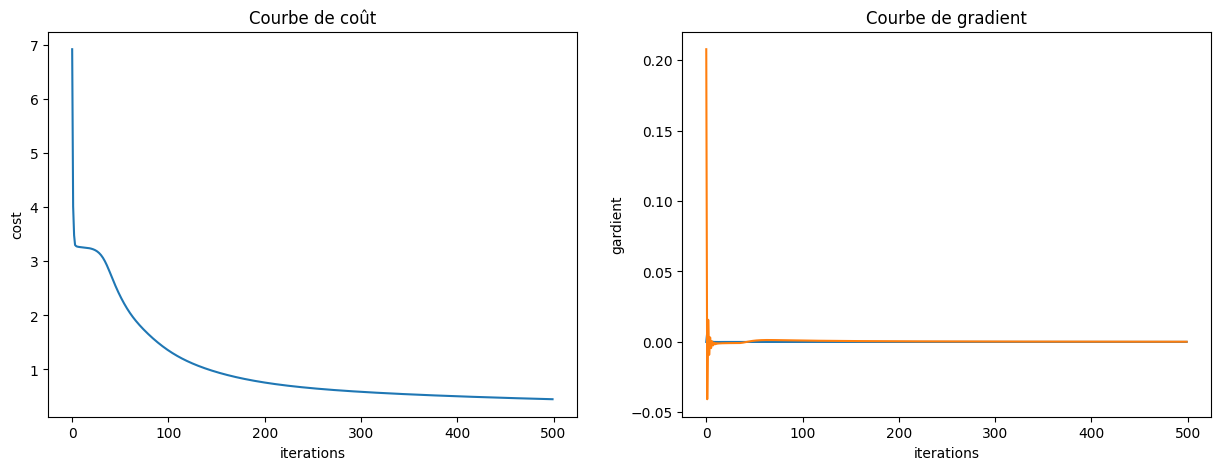

In [ ]:
plot_cost_gradient(losses, gradients)

In [ ]:
computeCost(X, YY, theta[0], theta[1], hidden_layer_size,0)

0.4489489055831072

# TODO 4 : Régularisation
Mettre à jour le calcul du coût en ajoutant le terme de régularisation et comparer les résultats (avec et sans régularisation)

In [ ]:
iterations = 500
alpha = 1.3
lambda_= 1
theta_reg = [np.random.randn(*W1.shape) * 0.01, np.random.randn(*W2.shape) * 0.01]

theta_reg, losses_reg, gradients_reg = gradientDescent(X, YY, theta_reg, alpha, iterations, lambda_)

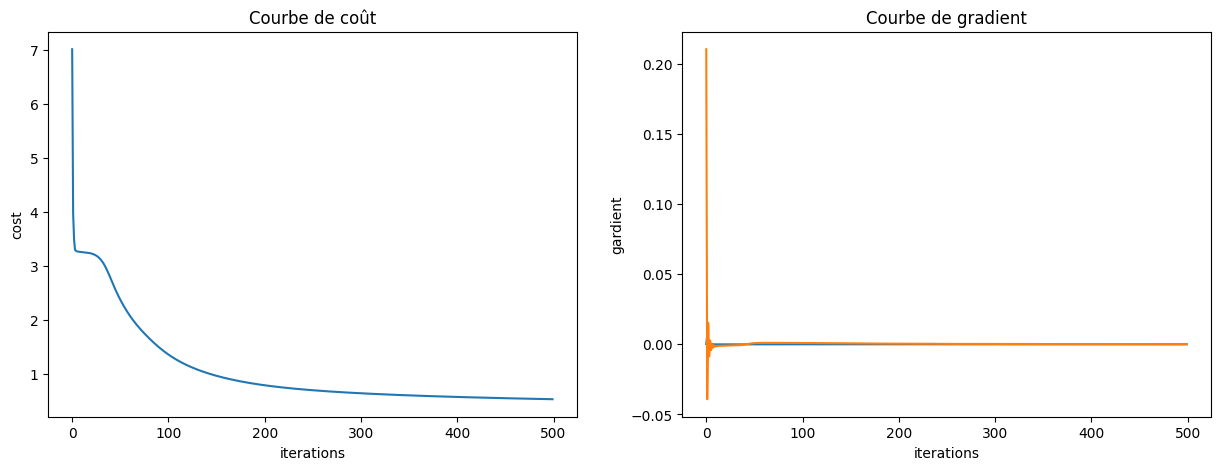

In [ ]:
plot_cost_gradient(losses_reg, gradients_reg)

In [ ]:
computeCost(X, YY, theta_reg[0], theta_reg[1], hidden_layer_size, lambda_)

0.5399467500905364

le cost du modele avec regularisation est impeu plus elever que de celui sans.

# TODO 5 : Prédiction

Appliquer une propagation en avant en utilisant les paramètres données pour prédir les classes de l'ensemble d'apprentissage.



In [ ]:
def predict (W1, W2, X):

    """
    Arguments:
    W1 -- matrice de poids pour la première couche, de forme (taille_couches_cachées, taille_couche_d'entrée + 1)
    W2 -- matrice de poids pour la deuxième couche, de forme (nombre_d'étiquettes, taille_couches_cachées + 1)
    X -- données d'entrée, de forme (nombre_d'échantillons, taille_couche_d'entrée)

    Renvoie:
    y_pred -- étiquettes de classe prédites, de forme (nombre_d'échantillons, 1)
    """

    # Calculer la sortie de la première couche cachée
    layer1_output = Sigmoid(X @ W1.T)

    # Ajouter un biais à la sortie de la première couche cachée
    layer2_input = np.column_stack((np.ones((X.shape[0], 1)), layer1_output))

    # Calculer la sortie de la deuxième couche cachée
    layer2_output = Sigmoid(layer2_input @ W2.T)

    # Prédire les étiquettes de classe en choisissant la sortie avec la valeur maximale
    y_pred = np.argmax(layer2_output, axis=1).reshape(-1, 1)

    return y_pred

In [ ]:
# sans regularisation
y_pred=predict(theta[0],theta[1],X)
precision = np.mean(y==y_pred)*100
precision

94.04

In [ ]:
#avec regularisation
y_pred = predict(theta_reg[0], theta_reg[1], X)
precision = np.mean(y==y_pred)*100
precision

93.76

# optionnel 1 : Vérification de l'implementation
Comparer vos algorithmes à ceux de scikitlearn

In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='sgd', alpha=0.01, activation='logistic', max_iter=5000,
        hidden_layer_sizes=(25,), random_state=42)
clf.fit(X[:, 1:], YY)

MLPClassifier(activation='logistic', alpha=0.01, hidden_layer_sizes=(25,),
              max_iter=5000, random_state=42, solver='sgd')

In [ ]:
y_pred = np.argmax(clf.predict(X[:, 1:]), axis=1)[..., np.newaxis]
precision = np.mean(y==y_pred)*100
precision

90.06

In [ ]:
clf.score(X[:, 1:], YY) * 100

89.22

# Optionnel 2 : Visualisation des poids
    
La visualisation de poids permet de voir quel partie du réseau est activé et pour quelle classe.
Il est possible de visulaiser les paramètres theta1 .
Ceci peut se faire en utilisant un reshape de ces paramètres afin d'avoir 25 images de taille 20x20 (n'oubliez pas d'ignorer la premuère colonne, celle du biais)

In [ ]:
def visualize_weights(w1, w2):
    cmap = 'Blues' # Change the color map here
    plt.figure(figsize=(50, 20))
    for i in range(w1.shape[0]):
        plt.subplot(3, 13, i + 1)
        plt.imshow(np.reshape(w1[i][1:], (20, 20)), cmap=cmap) # Add the cmap argument here
    for i in range(w2.shape[0]):
        plt.subplot(3, 13, w1.shape[0] + i + 2)
        plt.imshow(np.reshape(w2[i][1:], (-1, 1)), cmap=cmap) # Add the cmap argument here


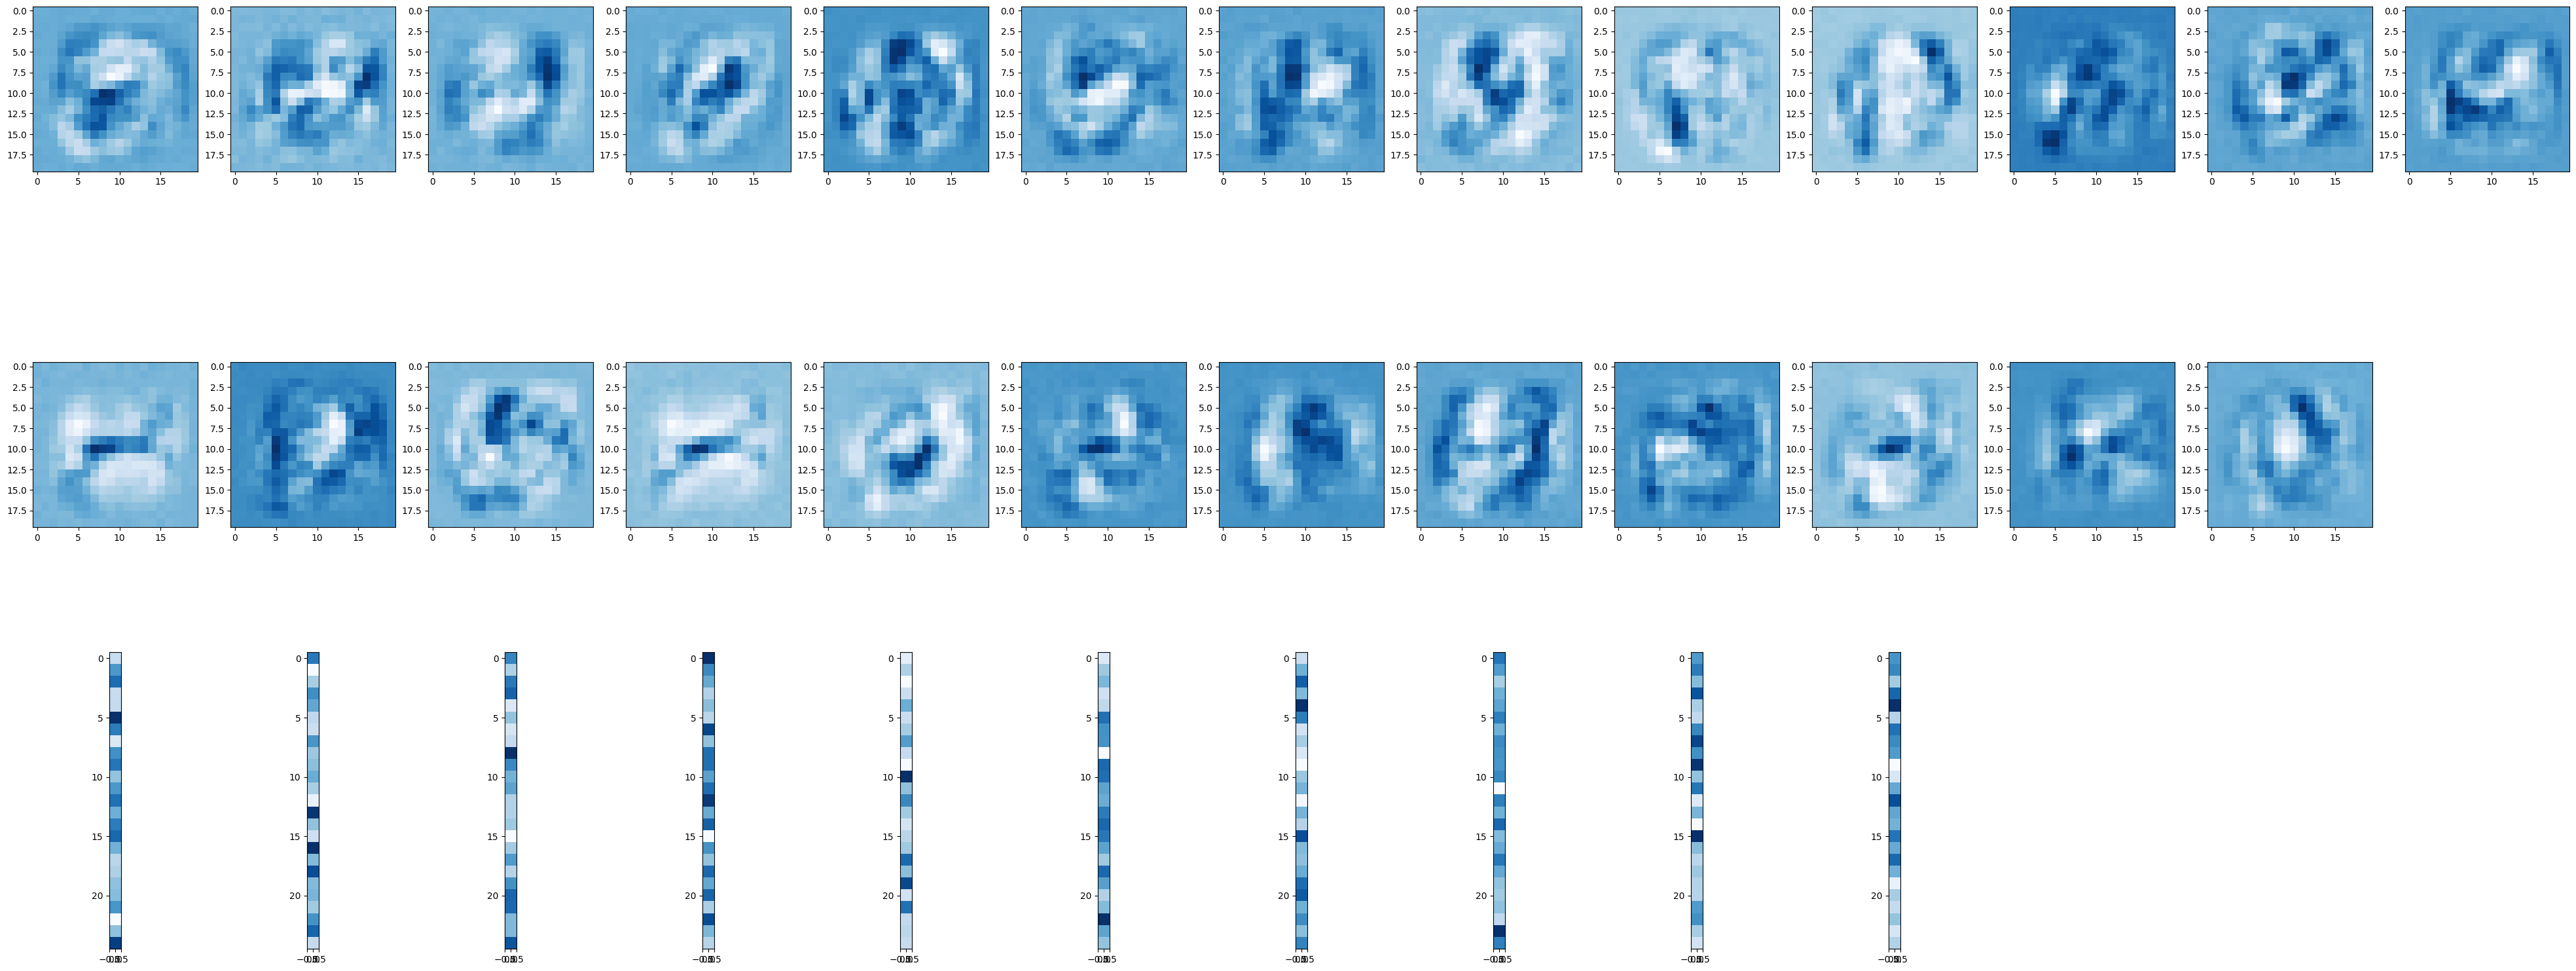

In [ ]:
visualize_weights(theta[0], theta[1])

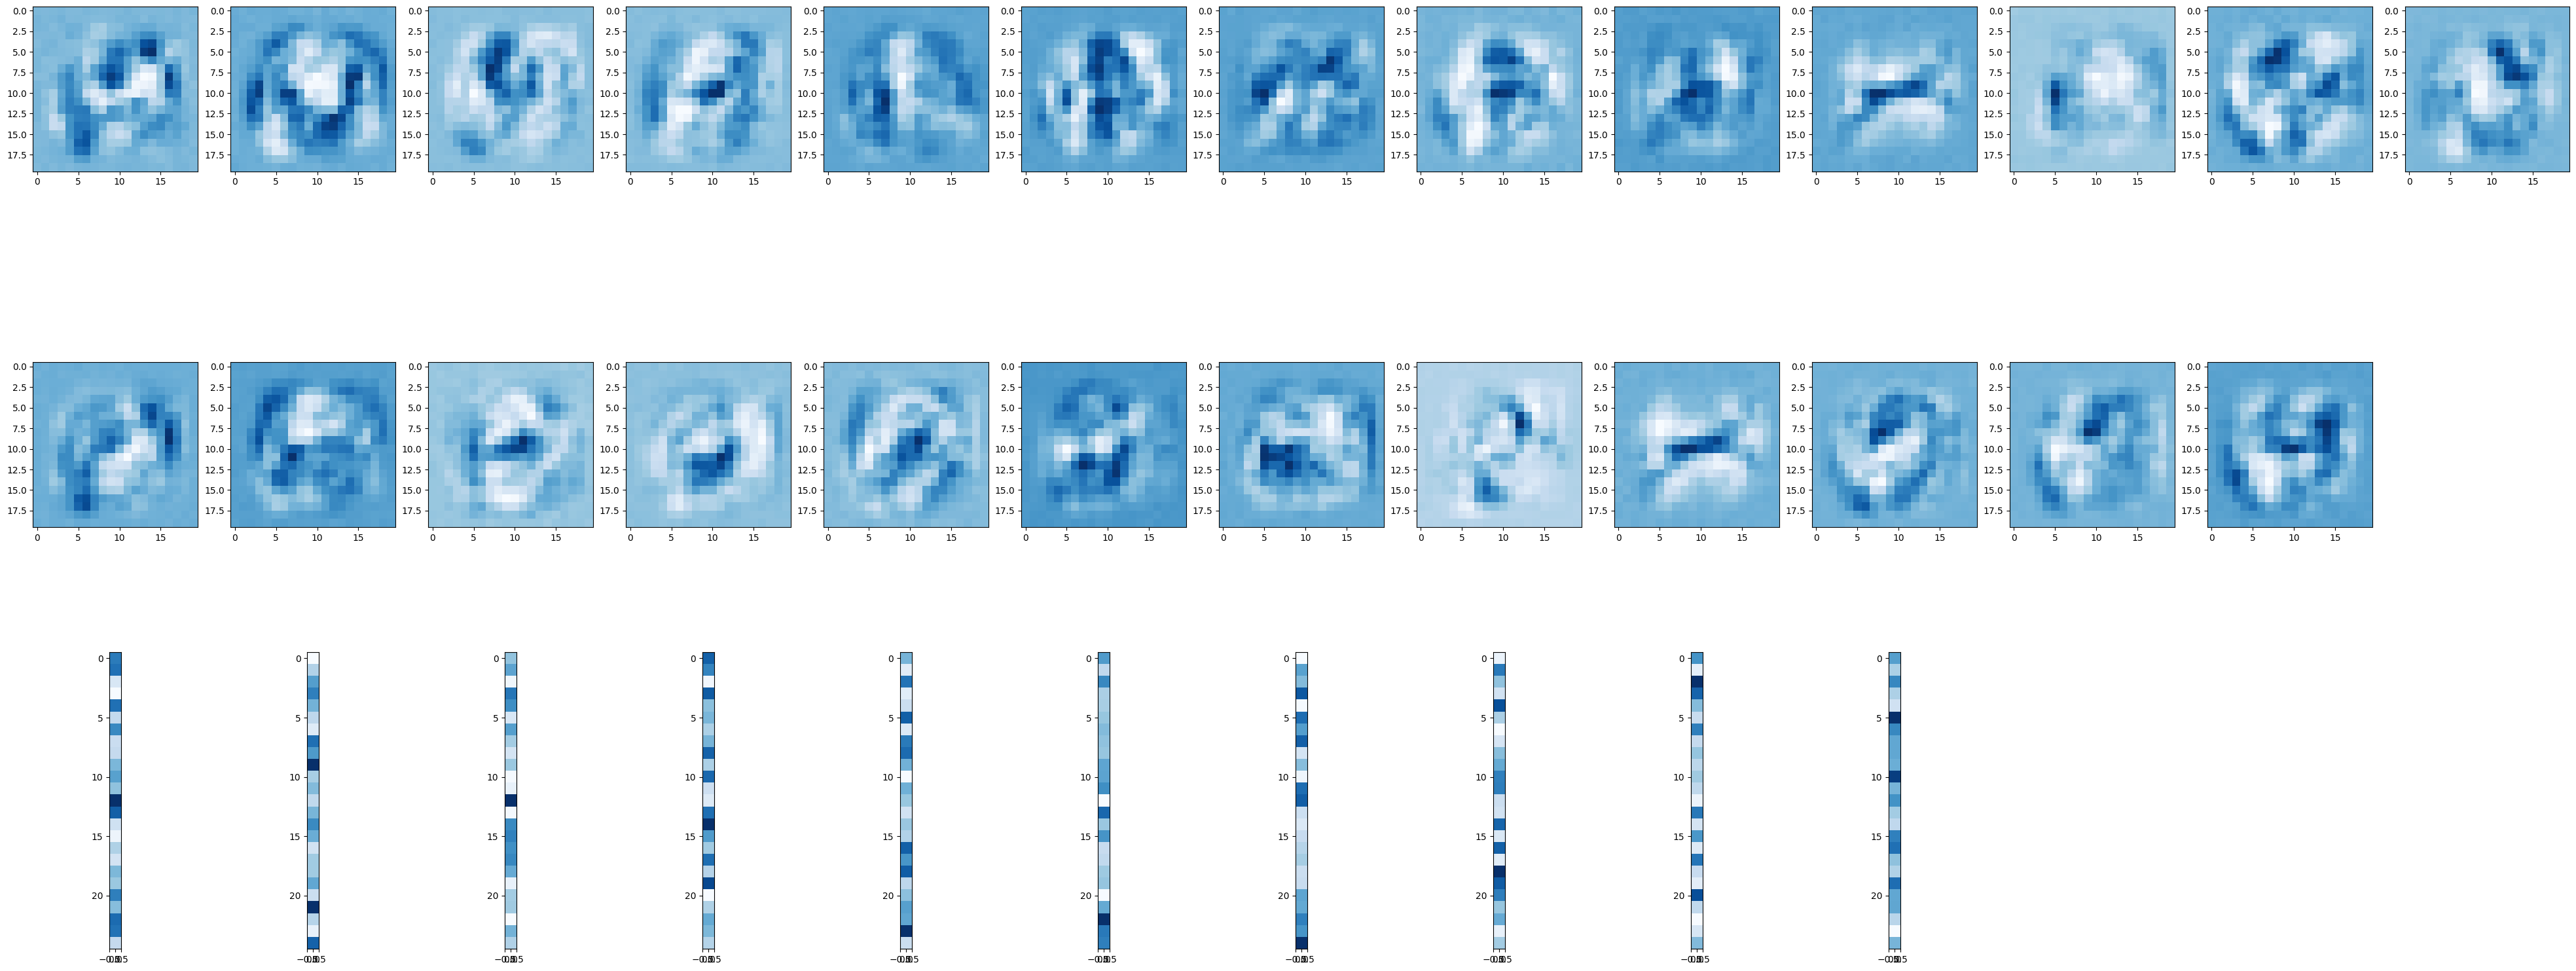

In [ ]:
visualize_weights(theta_reg[0], theta_reg[1])

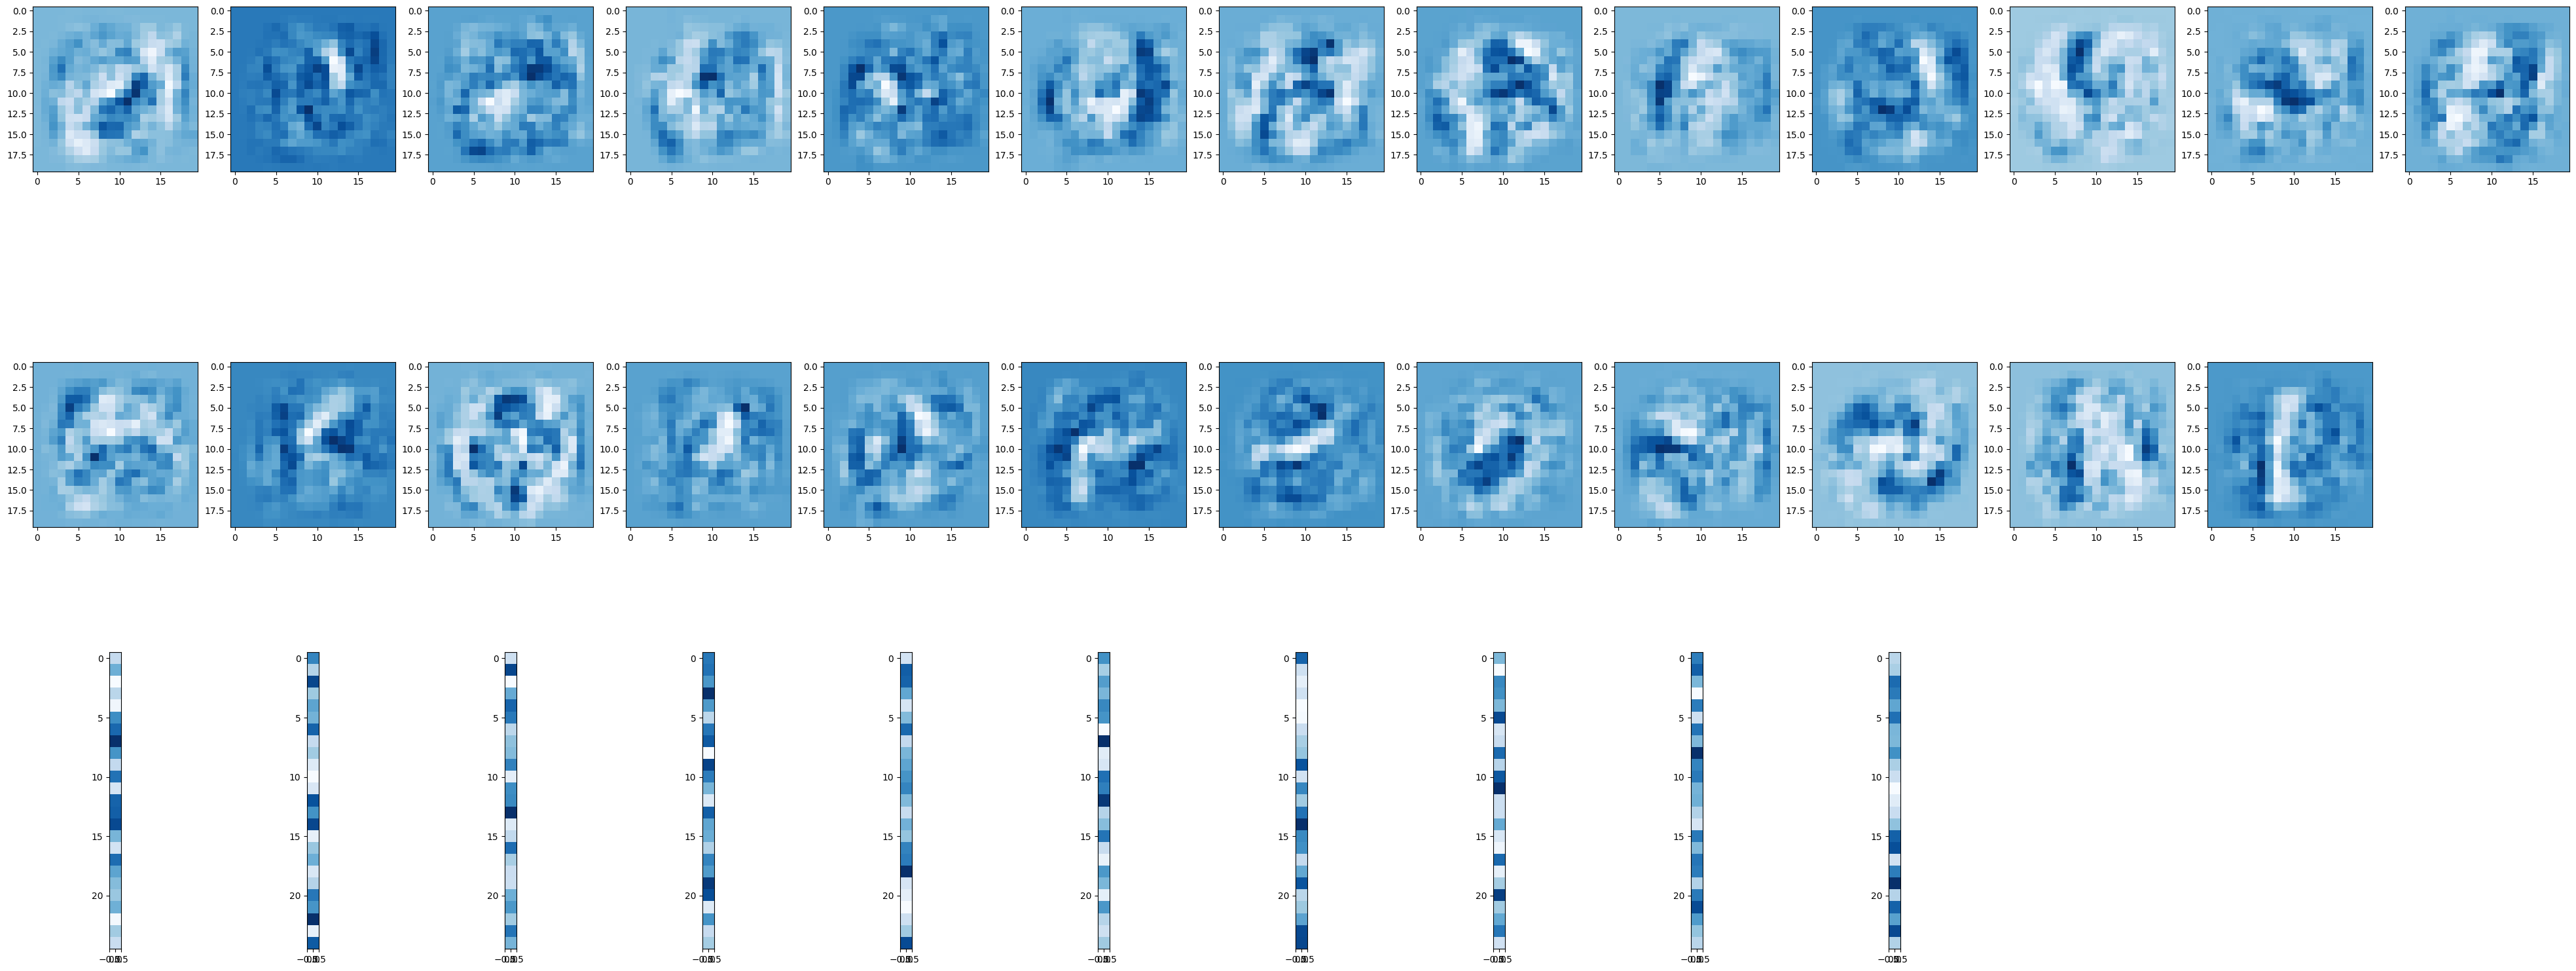

In [ ]:
visualize_weights(W1, W2)

# Optionnel 3 : Renforcement de l'apprentissage
Mettre ici toute idée qui pourrait renforcer votre apprentissage

On implémente une version du gradient descent stochastique avec mini-batches pour entraîner le réseau de neurones et améliorer la précision

In [ ]:
def mini_batch_gradient_descent(X, Y, theta_init, alpha, batch_size, num_iterations):
    m = X.shape[0]
    num_batches = int(np.ceil(m / batch_size))
    losses_batch = []
    gradients_batch = []
    theta_batch = theta_init

    for _ in range(num_iterations):
        for i in range(num_batches):
            batch_start = i * batch_size
            batch_end = min(batch_start + batch_size, m)
            X_batch = X[batch_start:batch_end]
            Y_batch = Y[batch_start:batch_end]

            loss, grad = NNCostFunction(X_batch, Y_batch, theta_batch[0], theta_batch[1], hidden_layer_size)

            theta_batch[0] -= alpha * grad[0]
            theta_batch[1] -= alpha * grad[1]

            losses_batch.append(loss)
            gradients_batch.append((grad[0].mean(), grad[1].mean()))

    losses_batch = np.asarray(losses_batch)
    gradients_batch = np.asarray(gradients_batch)
    return losses_batch, gradients_batch, theta_batch

batch_size = 40
num_iterations = 300
alpha = 0.1
theta_init = [np.random.normal(0, np.sqrt(1/212), W1.shape), np.random.normal(0, np.sqrt(1/17), W2.shape)]

losses_batch, gradients_batch, theta_batch = mini_batch_gradient_descent(X, YY, theta_init, alpha, batch_size, num_iterations)

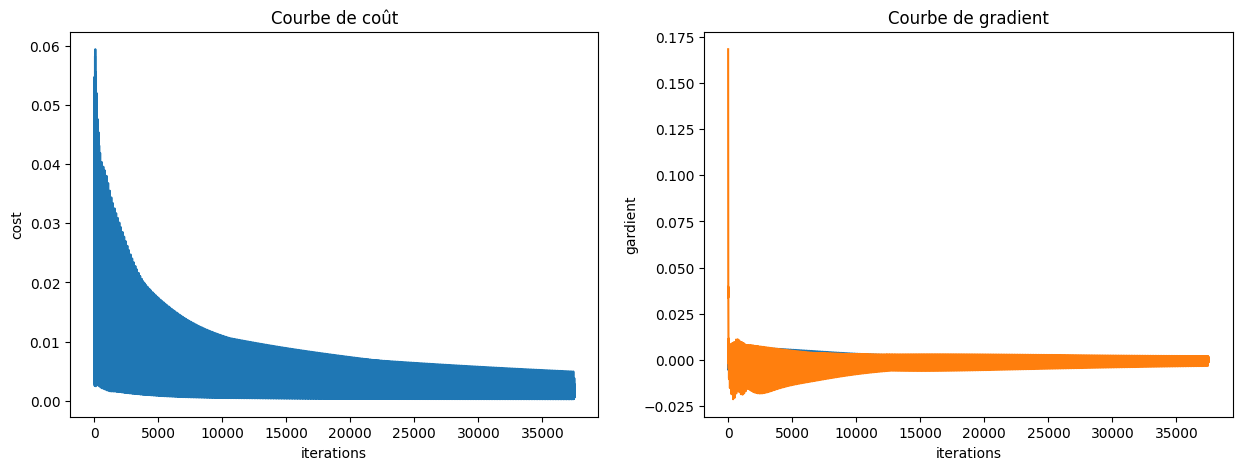

In [ ]:
plot_cost_gradient(losses_batch, gradients_batch)


In [ ]:
computeCost(X, YY, theta_batch[0], theta_batch[1], hidden_layer_size, 0)


0.18935621004854045

In [ ]:
y_pred = predict(theta_batch[0], theta_batch[1], X)
precision = np.mean(y==y_pred)*100
precision

98.02

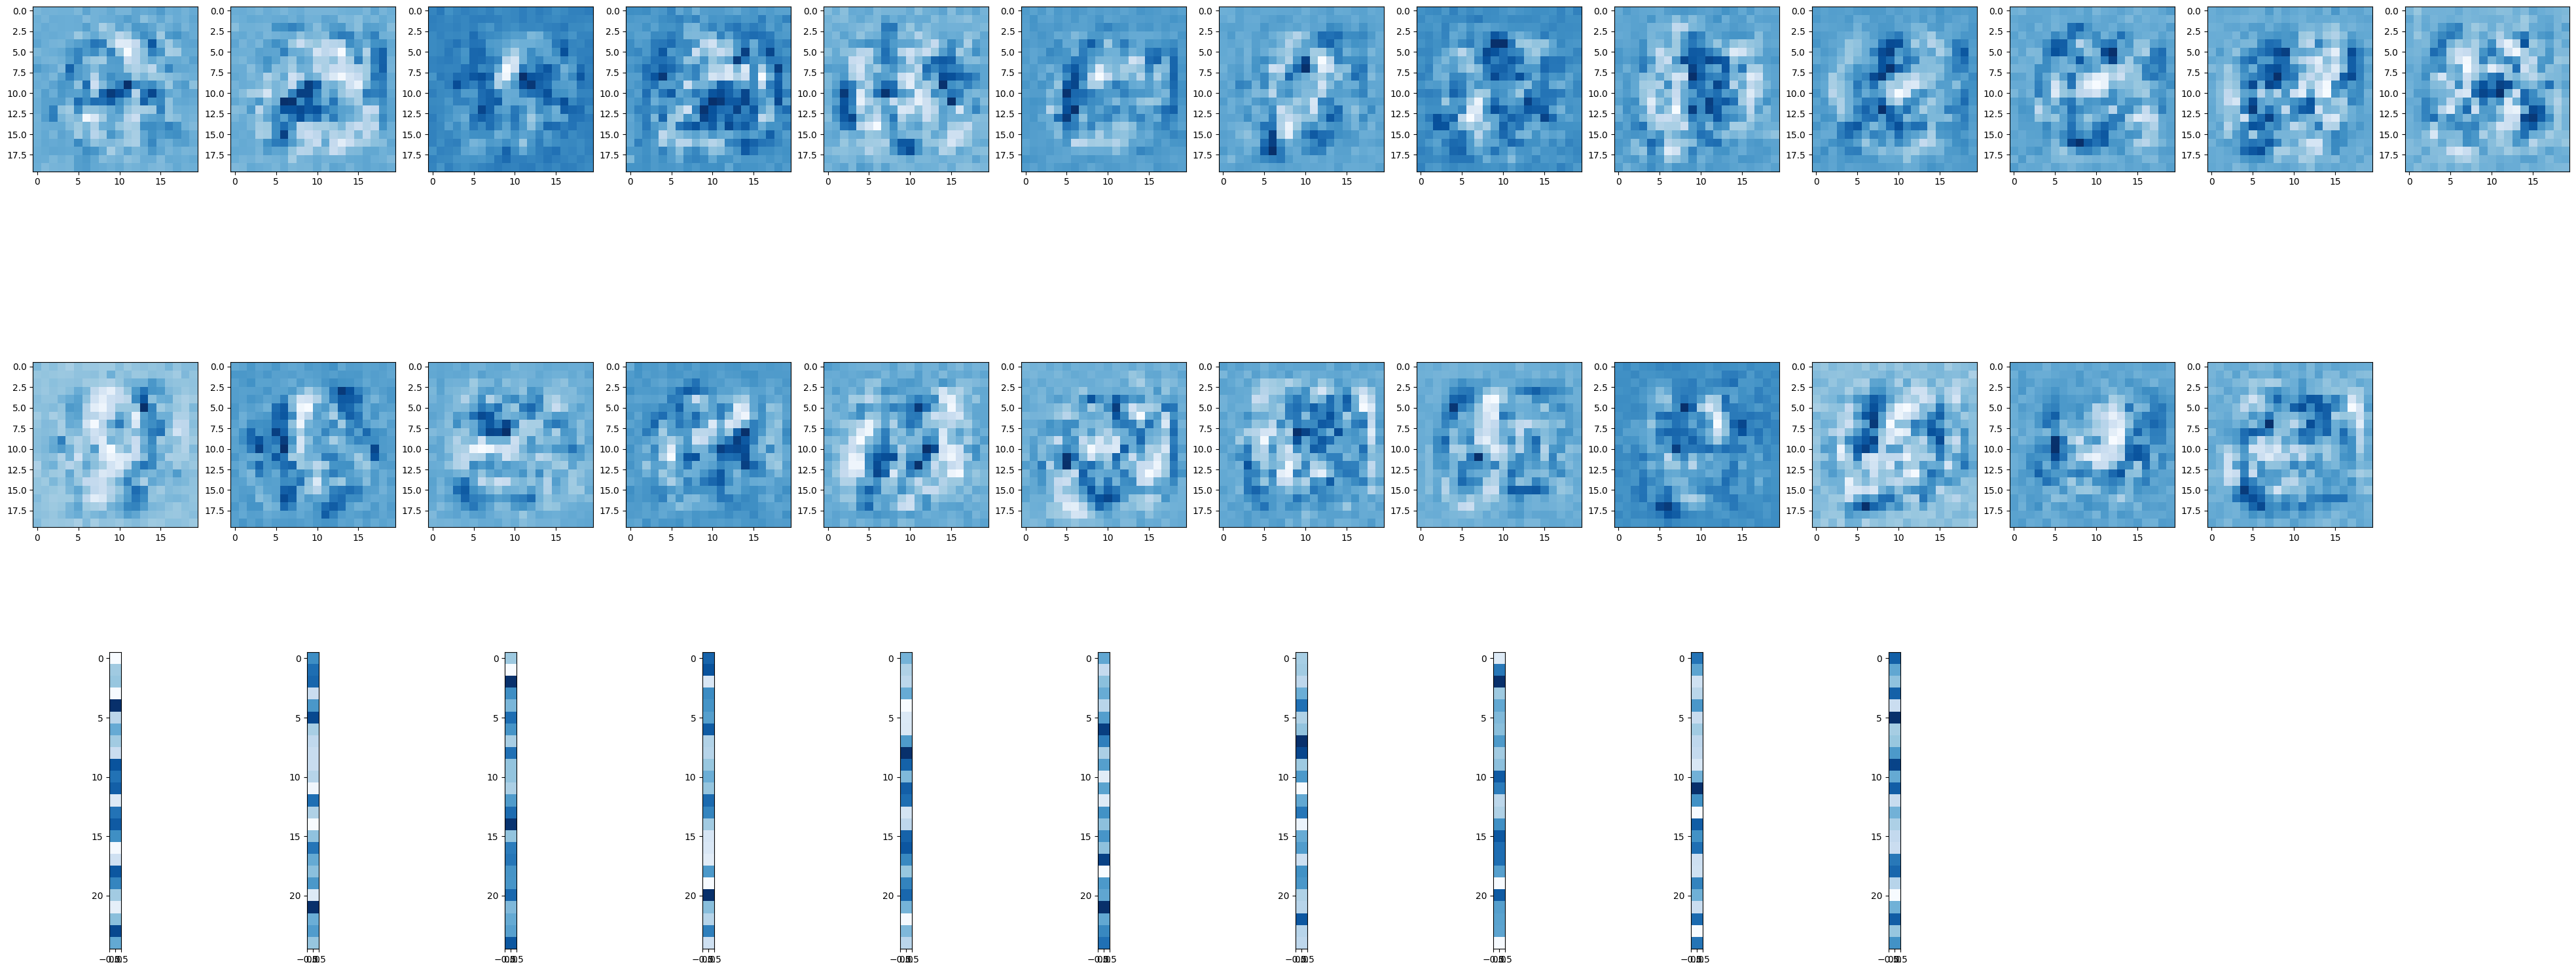

In [ ]:
visualize_weights(theta_batch[0], theta_batch[1])

# Consignes

Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le vendredi 29Avril 2022 à 22h


In [ ]:
# bonne chance